<center><font color='red'><font size=6>SMART ATTENDANCE SYSTEM</font></center> 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.preprocessing import LabelEncoder

In [4]:
img = cv2.imread("unprocessed\\lakshita\\2.jpg",-1)

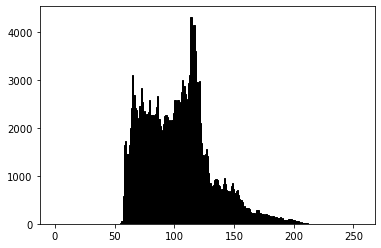

In [5]:
plt.hist(img.flatten(), 256, range=(0, 255), fc='k', ec='k');

In [6]:
cv2.imshow("cropped face", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<font color='red'><font size=6>Preprocessing</font>

# - First contrast stretching then denoising

In [7]:
maxi = np.amax(img)
mini = np.amin(img)
intensity_range = maxi - mini

In [8]:
intensity_range

160

In [9]:
frst_stretch = ((img.astype('float64') - mini) * 255 / intensity_range).astype('uint8')

In [10]:
smoothened = cv2.fastNlMeansDenoising(frst_stretch,None,10,21,7)

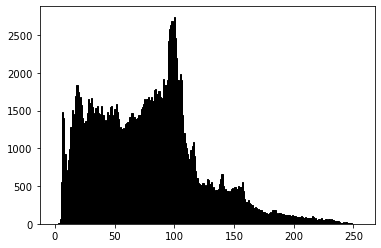

In [11]:
plt.hist(smoothened.flatten(), 256, range=(0, 255), fc='k', ec='k');

In [12]:
cv2.imshow("cropped face", smoothened)
cv2.waitKey(0)
cv2.destroyAllWindows()

# - First denoising then contrast stretching

In [14]:
first_denoise = cv2.fastNlMeansDenoising(img,None,10,21,7)

In [15]:
maxi = np.amax(first_denoise)
mini = np.amin(first_denoise)
intensity_range = maxi - mini

In [16]:
intensity_range

154

In [17]:
stretched = ((first_denoise.astype('float64') - mini) * 255 / intensity_range).astype('uint8')

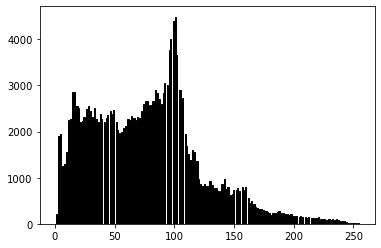

In [18]:
plt.hist(stretched.flatten(), 256, range=(0, 255), fc='k', ec='k');

In [19]:
cv2.imshow("cropped face", stretched)
cv2.waitKey(0)
cv2.destroyAllWindows()

<font color='red'><font size=6>Comparison of accuracy obtained with and without preprocessing</font>

# - Without preprocessing

In [373]:
directory = ("images1")
path = [os.path.join(directory,file)+"\\" for file in os.listdir(directory)]
faces=[]
ids = []
for roll in path[0:]:
    for image in os.listdir(roll):
        img_path = os.path.join(roll, image)
        img = Image.open(img_path).convert('L')
        img_arr = np.array(img, 'uint8')
        id = str(os.path.split(os.path.split(roll)[0])[1])
        faces.append(img_arr)
        ids.append(id)
        cv2.imshow("Training",img_arr)
        cv2.waitKey(1)==13
label_encoder = LabelEncoder()
ids = label_encoder.fit_transform(ids)
np.save('classes.npy', label_encoder.classes_)
ids=np.array(ids)
cv2.destroyAllWindows()

In [374]:
from sklearn.model_selection import train_test_split

In [375]:
X_train, X_test, y_train, y_test = train_test_split(faces,ids, test_size=0.25, random_state=42)

In [376]:
model = cv2.face.LBPHFaceRecognizer_create()

In [377]:
model.train(X_train,y_train)

In [378]:
from time import sleep
from tqdm import tqdm

In [379]:
from sklearn.metrics import accuracy_score

In [380]:
y_predict = []
rolls = []
for i in tqdm(range(0,len(y_test))):
    roll,pred = model.predict(X_test[i])
    pred = float(100*(1-pred/300))
    y_predict.append(pred)
    rolls.append(roll)

100%|██████████| 216/216 [00:09<00:00, 22.69it/s]


In [347]:
sum = 0
for i in range(0,len(y_predict)):
    sum = sum + y_predict[i]
sum/len(y_predict)

96.67204150320694

In [372]:
accuracy_score(rolls,y_test)

0.9490740740740741

# - With preprocessing

In [350]:
directory = ("images1")
path = [os.path.join(directory,file)+"\\" for file in os.listdir(directory)]
faces=[]
ids = []
for roll in path[0:]:
    for image in os.listdir(roll):
        img_path = os.path.join(roll, image)
        img = Image.open(img_path).convert('L')
        img_arr = np.array(img, 'uint8')
        img_arr = cv2.fastNlMeansDenoising(img_arr,None,5,21,7)
        maxi = np.amax(img_arr)
        mini = np.amin(img_arr)
        intensity_range = maxi - mini
        img_arr = ((img_arr.astype('float64') - mini) * 255 / intensity_range).astype('uint8')
        id = str(os.path.split(os.path.split(roll)[0])[1])
        faces.append(img_arr)
        ids.append(id)
        cv2.imshow("Training",img_arr)
        cv2.waitKey(1)==13
label_encoder = LabelEncoder()
ids = label_encoder.fit_transform(ids)
np.save('classes.npy', label_encoder.classes_)
ids=np.array(ids)
cv2.destroyAllWindows()

In [366]:
X_train, X_test, y_train, y_test = train_test_split(faces,ids, test_size=0.25, random_state=42)

In [367]:
model = cv2.face.LBPHFaceRecognizer_create()

In [368]:
model.train(X_train,y_train)

In [369]:
roll,predict = model.predict(X_test[0])

In [370]:
y_predict = []
rolls = []
for i in tqdm(range(0,len(y_test))):
    roll,pred = model.predict(X_test[i])
    pred = float(100*(1-pred/300))
    y_predict.append(pred)
    rolls.append(roll)

100%|██████████| 216/216 [00:08<00:00, 25.59it/s]


In [381]:
sum = 0
for i in range(0,len(y_predict)):
    sum = sum + y_predict[i]
sum/len(y_predict)

96.78452224319827

In [382]:
accuracy_score(rolls,y_test)

0.9537037037037037

## accuracy Improved !!